In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Flatten, Dense, Input, ReLU

2021-11-02 16:54:12.351233: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
path_to_dataset = '../dataset/'
PATH = os.path.join(os.path.dirname(path_to_dataset))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (32, 32)

In [3]:
# Train dataset 
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 782 files belonging to 2 classes.


2021-11-02 16:54:14.462917: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-02 16:54:14.487102: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-11-02 16:54:14.487131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: george-ubuntu
2021-11-02 16:54:14.487138: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: george-ubuntu
2021-11-02 16:54:14.487221: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.57.2
2021-11-02 16:54:14.487245: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.57.2
2021-11-02 16:54:14.487251: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.57.2
2021-11-02 16:54:14.487588: I tensorflow/core/platform/cpu_feature_guard.cc:142

In [4]:
# Validation dataset
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


Found 220 files belonging to 2 classes.


In [5]:
# Model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(8, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                49168     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 49,322
Trainable params: 49,322
Non-trainable params: 0
_________________________________________________________________


In [7]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

2021-11-02 16:54:17.540441: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-02 16:54:17.559979: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2799925000 Hz


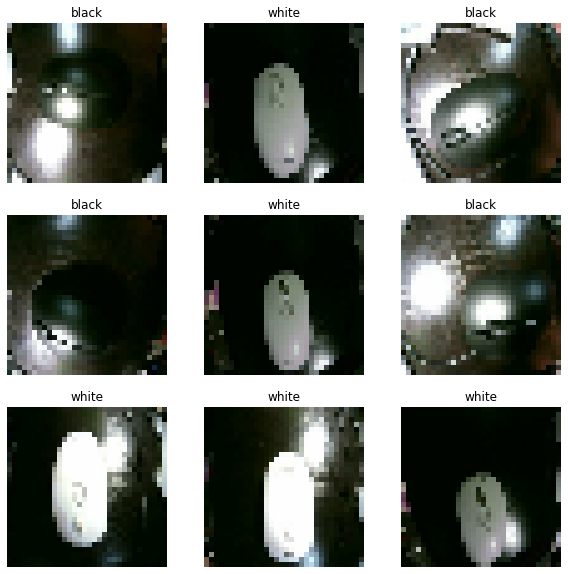

In [8]:
# Visualize the dataset 
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [9]:
# Hyperparameter 
base_learning_rate = 0.0001
initial_epochs = 200

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
# Evaluate model before training 
loss0, accuracy0 = model.evaluate(validation_dataset)

6/6 [==============================] - 0s 1ms/step - loss: 0.8256 - accuracy: 0.4947


In [ ]:
# Train model 
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.4974 - val_loss: 0.5473 - val_accuracy: 0.5106
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.4987 - val_loss: 0.5610 - val_accuracy: 0.5106
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.5000 - val_loss: 0.5549 - val_accuracy: 0.5000
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5191 - accuracy: 0.5000 - val_loss: 0.5587 - val_accuracy: 0.4947
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.5000 - val_loss: 0.5505 - val_accuracy: 0.5053
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.5000 - val_loss: 0.5621 - val_accuracy: 0.4894
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5146 - accuracy: 0.5000 - val_loss: 0.5608 - val_accuracy: 0.4787
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5283 - val_accuracy: 0.4947
Epoch 60/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5270 - val_accuracy: 0.4894
Epoch 61/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5283 - val_accuracy: 0.4947
Epoch 62/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5303 - val_accuracy: 0.4894
Epoch 63/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5157 - val_accuracy: 0.5106
Epoch 64/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5243 - val_accuracy: 0.5053
Epoch 65/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5182 - val_accuracy: 0.5213
Epoch 

25/25 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5210 - val_accuracy: 0.5053
Epoch 117/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5263 - val_accuracy: 0.5000
Epoch 118/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5397 - val_accuracy: 0.4734
Epoch 119/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5296 - val_accuracy: 0.5000
Epoch 120/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5116 - val_accuracy: 0.5213
Epoch 121/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5283 - val_accuracy: 0.4947
Epoch 122/200
25/25 [==============================] - 0s 5ms/step - loss: 0.5061 - accuracy: 0.5000 - val_loss: 0.5283 - val_accuracy: 0.4947
Epoch 123/200

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch
     )

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [ ]:
#To quantize the input and output tensors, and make the converter throw an error if it encounters an 
# operation it cannot quantize, convert the model again with some additional parameters

def representative_dataset():
    for _ in range(100):
        data = np.random.rand(1, 32, 32, 3)
        yield [data.astype(np.float32)]

In [ ]:
# Save model 
model.save('mouse_model.h5')

In [ ]:
# Load saved model 
model=tf.keras.models.load_model("mouse_model.h5")

# Apply model compression -  integer-only quantization¶
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

In [ ]:
# Save quantized model 
open("mouse_quantized.tflite", "wb").write(tflite_quant_model)

In [ ]:
rm -rf mouse_quantized.tflite

In [ ]:
rm -rf mouse_model.h5